In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
df = pd.read_csv('E goods sales data19-20.csv')

Inspect the data

In [11]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Strip the row

In [12]:
columns = ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address']

for col in columns:
    df[col] = df[col].str.strip()

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Dropping N/A value and unimportant duplicated value 

In [13]:
df.dropna(inplace=True)
df['Product'].value_counts()
df.drop(df[df['Product'] == 'Product'].index, inplace=True)

#check
df[df['Product'] == 'Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Grouping duplicate records and summing their quantities

In [14]:
df[df.duplicated(keep=False)]
df = (df.groupby(
    ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address'],as_index=False)
    ['Quantity Ordered'].sum()
)

In [15]:
#check
df[df.duplicated(keep=False)]
df.duplicated().sum()

np.int64(0)

Converting to numeric dtypes

In [16]:
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

Converting to datetime dtype

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')

In [18]:
# Dropping the 2020 sales
df = df[df['Order Date'].dt.year == 2019]

Splitting the address street,city,state and zip code for further analysis

In [19]:
df[['street', 'city', 'zip_code']] = df['Purchase Address'].str.split(', ', expand=True)
df[['state','zip_code']] = df['zip_code'].str.split(' ', expand=True)

Reordered and rename for clarity

In [20]:
df = df[['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address','street','city','zip_code','state']]
df.rename(columns={'Order ID':'order_id','Product':'product','Quantity Ordered':'quantity_ordered','Price Each':'price_each','Order Date':'order_date','Purchase Address':'purchase_address'},inplace=True)

Look for daily,weekly and monthly total revenue 

In [21]:
# Find the revenue
df['revenue'] = df['quantity_ordered']*df['price_each']

# Split the date for further analysis
df['day'] = df['order_date'].dt.date
dailyrevenue = df.groupby('day')['revenue'].sum().reset_index()

In [22]:
# Split the date for further analysis
df['week'] = df['order_date'].dt.to_period('W')
weeklyrevenue = df.groupby('week')['revenue'].sum().reset_index()

In [23]:
# Split the date for further analysis
df['month'] = df['order_date'].dt.to_period('M')
monthlyrevenue = df.groupby('month')['revenue'].sum().reset_index()

In [24]:
# Split the date for further analysis
df['year'] = df['order_date'].dt.year
yearlyrevenue = df.groupby('year')['revenue'].sum().reset_index()

Look for the daily,weekly and monthly revenue per product

In [25]:
dailyproductrevenue = df.groupby(['day','product'],as_index=False)['revenue'].sum()

In [26]:
weeklyproductrevenue = df.groupby(['week','product'],as_index=False)['revenue'].sum()
weeklyproductrevenue['week'] = weeklyproductrevenue['week'].dt.to_timestamp()

In [27]:
monthlyproductrevenue = df.groupby(['month','product'],as_index=False)['revenue'].sum()

In [28]:
yearlyproductrevenue = df.groupby(['year','product'],as_index=False)['revenue'].sum()

# What are the daily,weekly and monthly trends in revenue?

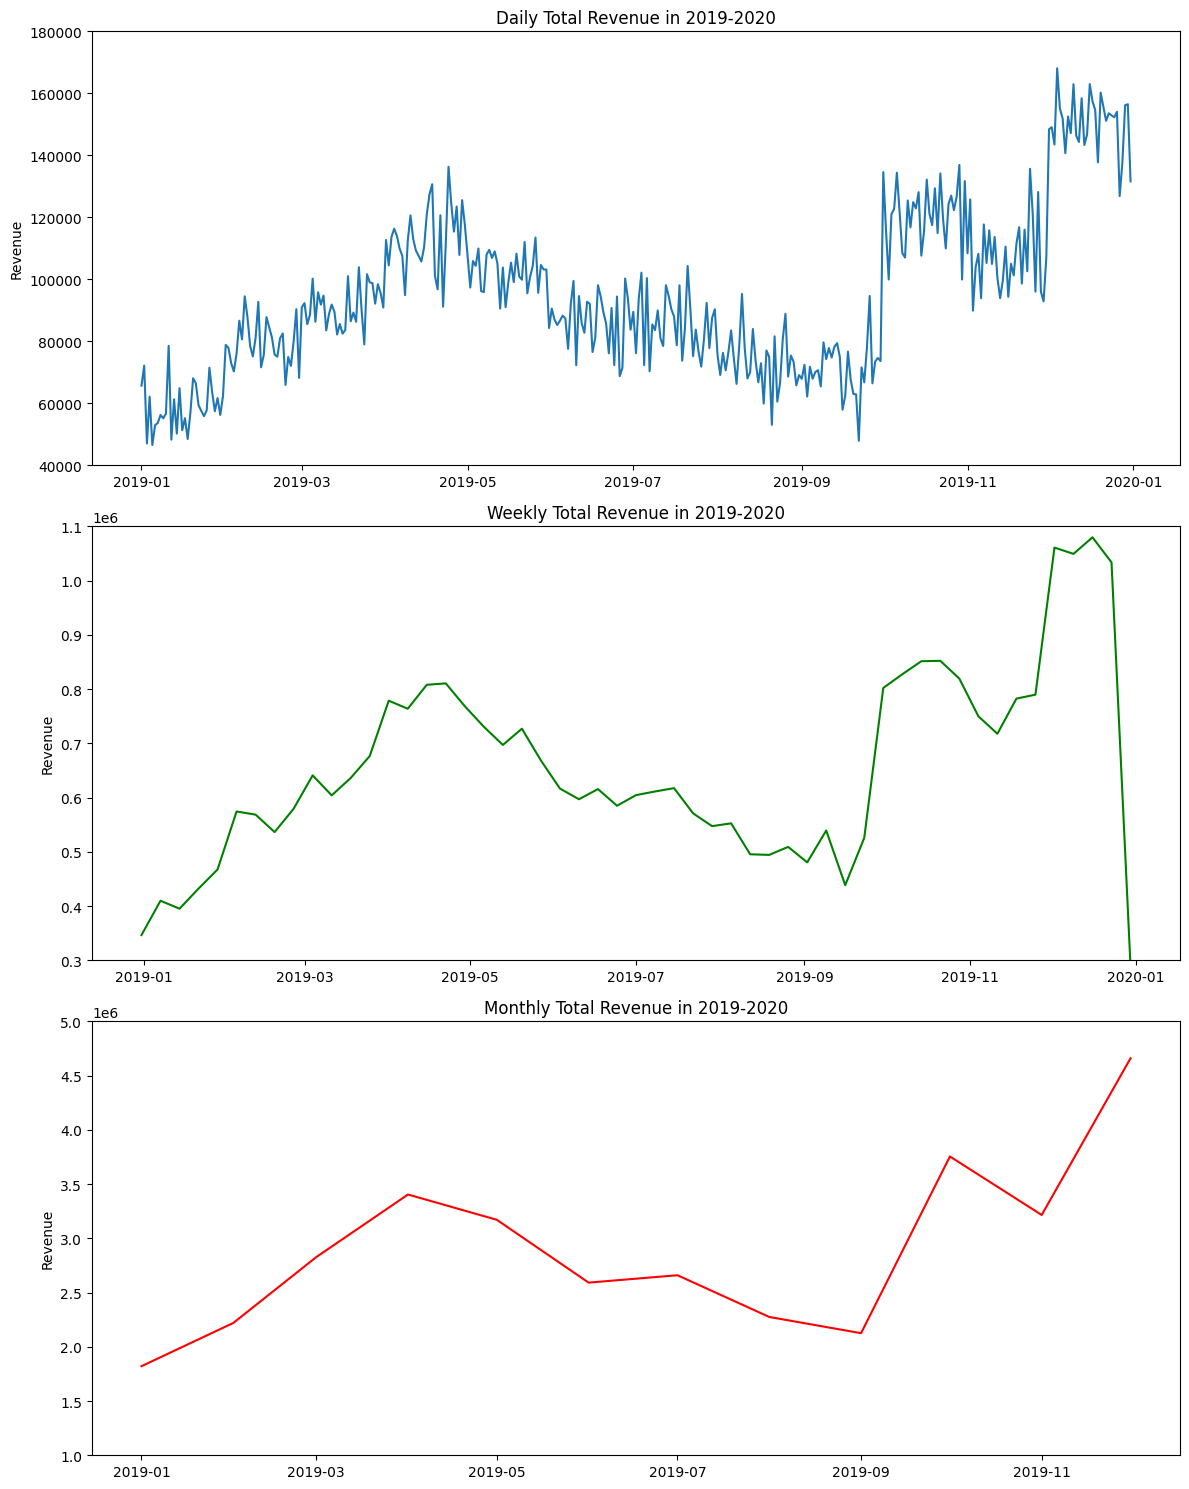

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharey=False)

# Daily revenue
axes[0].plot(dailyrevenue['day'], dailyrevenue['revenue'])
axes[0].set_title('Daily Total Revenue in 2019-2020')
axes[0].set_ylabel('Revenue')
axes[0].set_ylim(40000, 180000)

# Weekly revenue
axes[1].plot(weeklyrevenue['week'].dt.start_time, weeklyrevenue['revenue'], color='green')
axes[1].set_title('Weekly Total Revenue in 2019-2020')
axes[1].set_ylabel('Revenue')
axes[1].set_ylim(300000, 1100000)

# Monthly revenue
axes[2].plot(monthlyrevenue['month'].dt.start_time, monthlyrevenue['revenue'], color='red')
axes[2].set_title('Monthly Total Revenue in 2019-2020')
axes[2].set_ylabel('Revenue')
axes[2].set_ylim(1000000, 5000000)

plt.tight_layout()
plt.show()

# Do product with a lower price value have a higher sales?

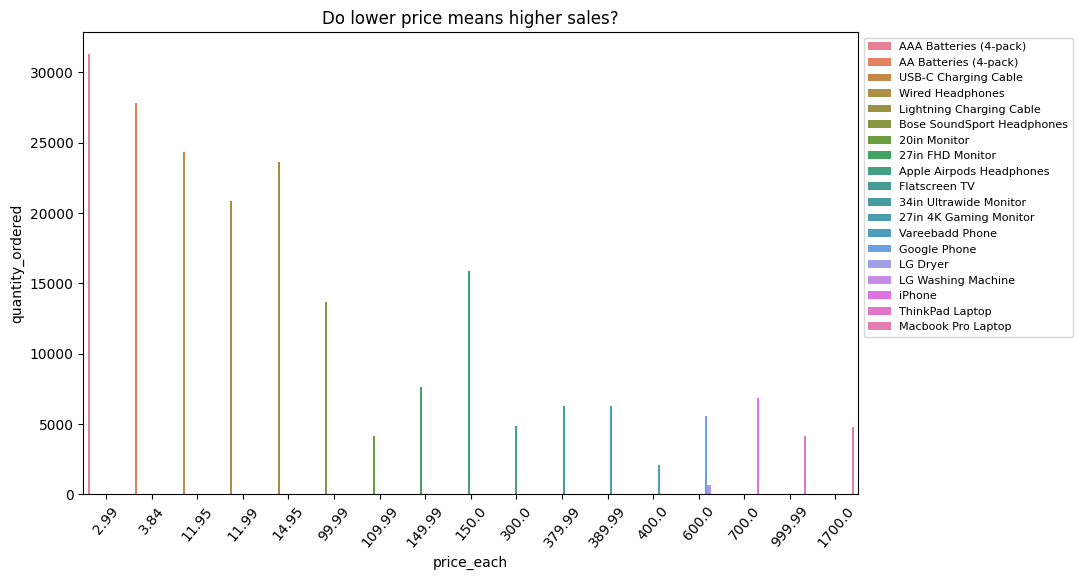

In [43]:
sales = df.groupby(['product','price_each'])['quantity_ordered'].sum().reset_index()
sales = pd.DataFrame(sales)
plt.figure(figsize=(10,6))
sns.barplot(data=sales,y='quantity_ordered',x='price_each',hue='product')
plt.title('Do lower price means higher sales?')
plt.legend(fontsize=8, bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=50)
plt.show()

Yes lower price does have a higher sales than higher price product.

# Does lower-price product have a higher revenue?

The chart below shows us that MacBook Pro consistently dominates monthly revenue, which is the highest price each product.

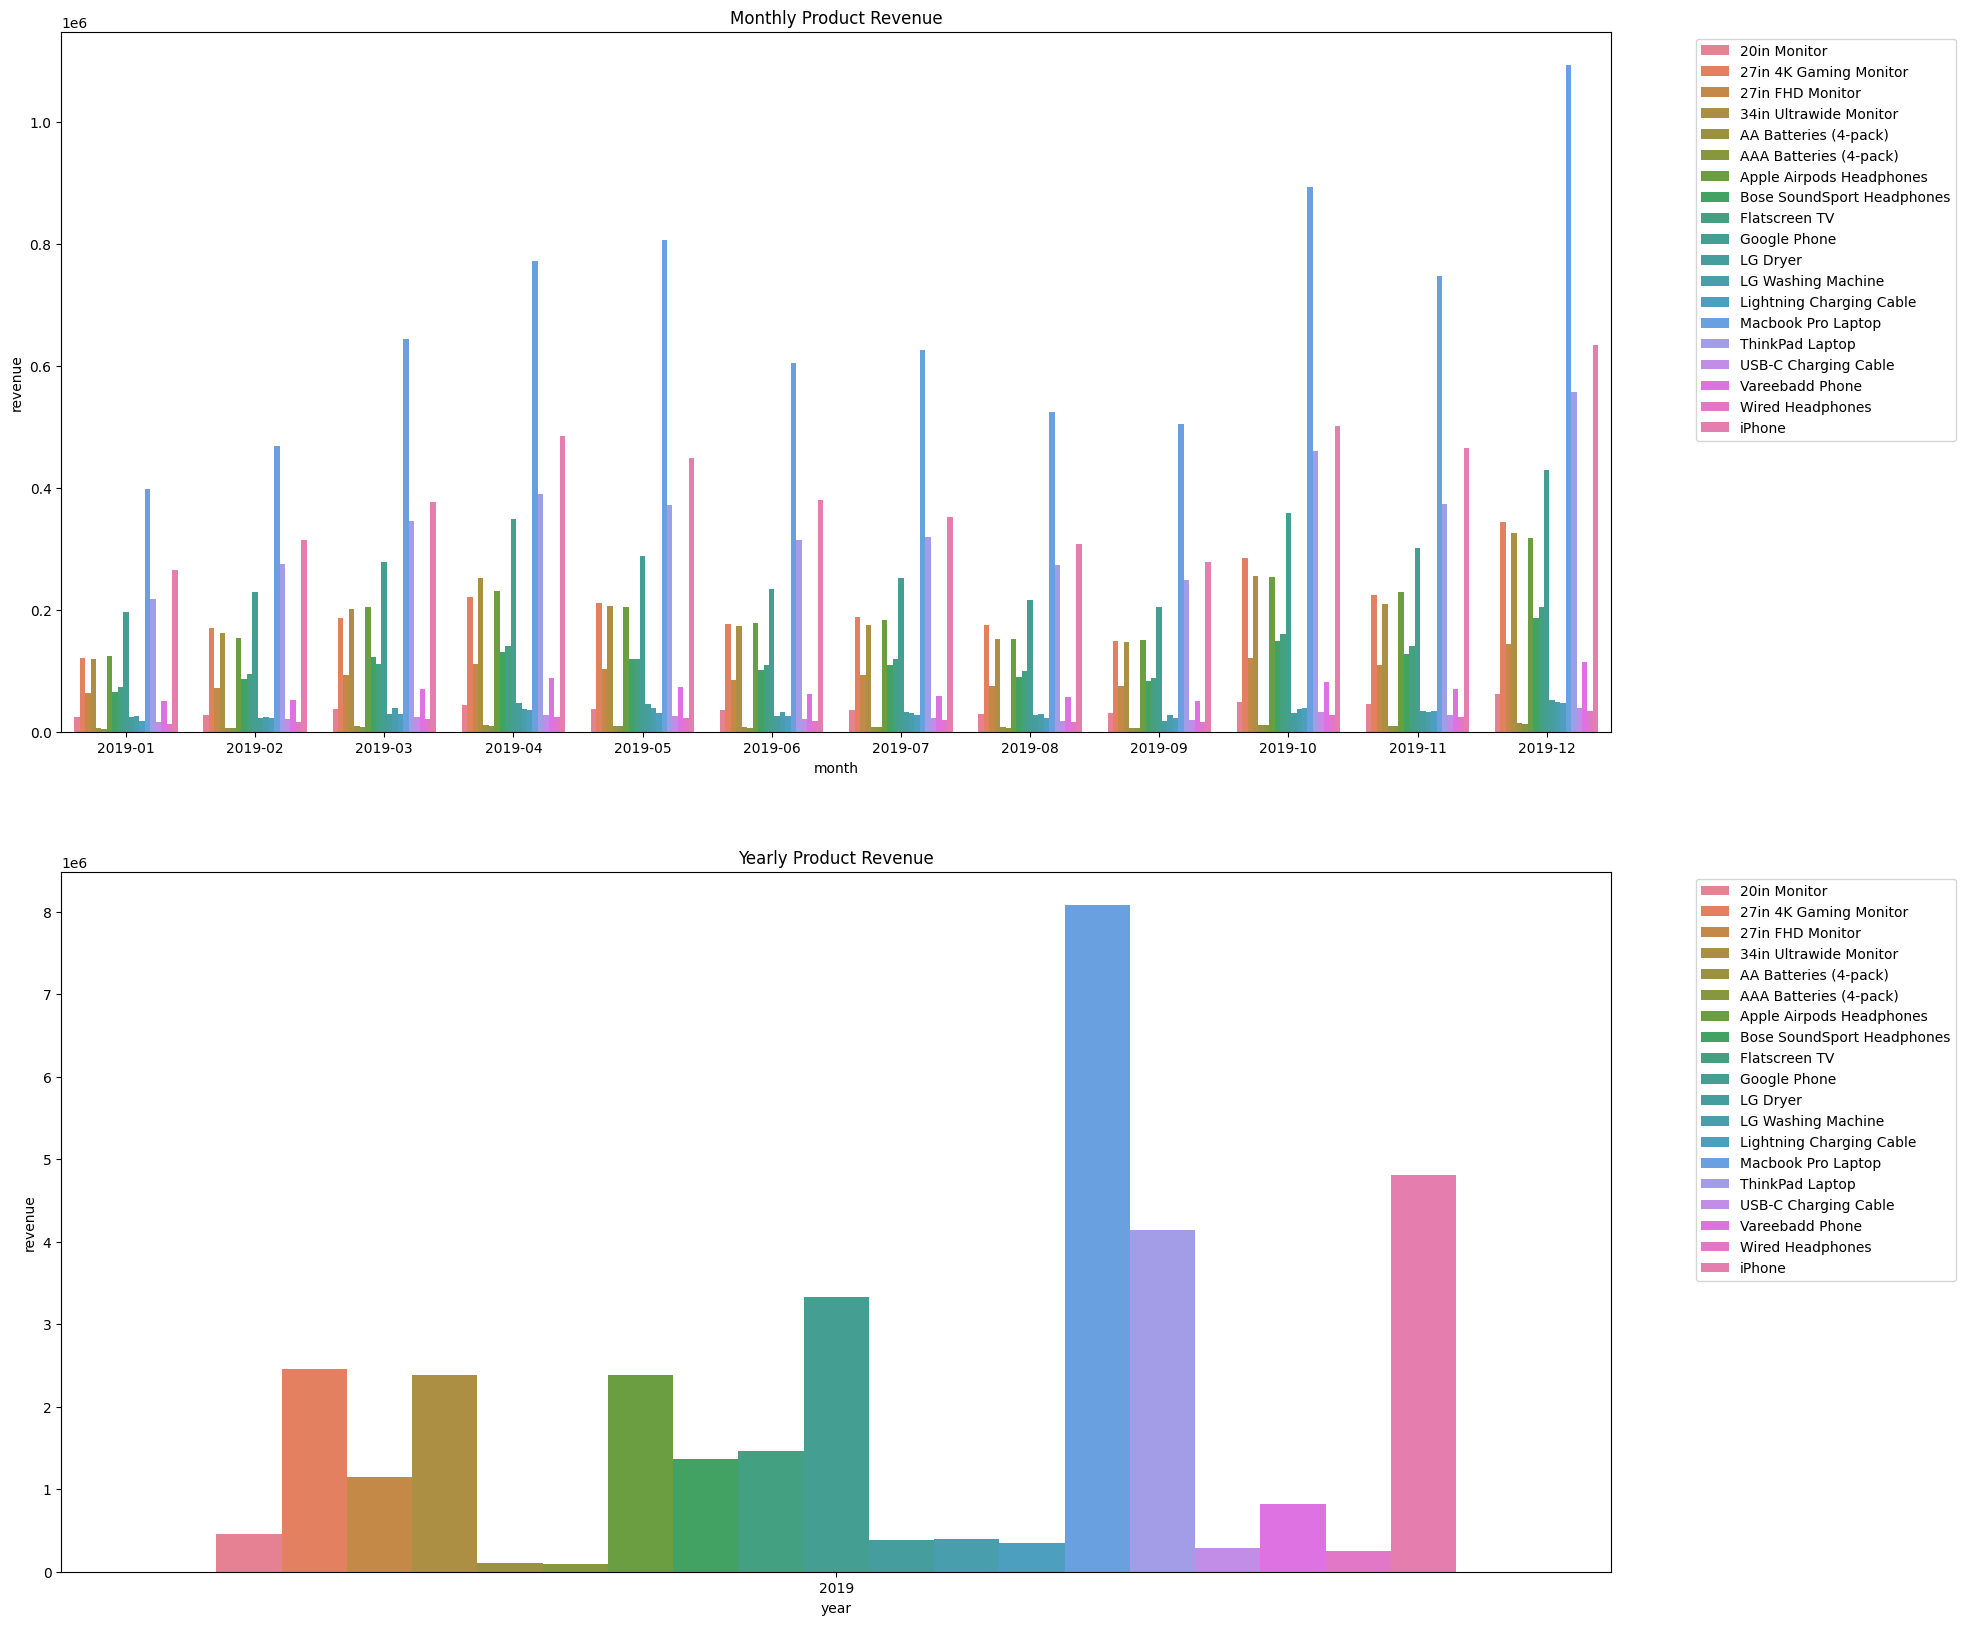

In [37]:
product_revenue = df.groupby(['product','price_each'])['revenue'].sum().reset_index()
fig, axes = plt.subplots(2, 1, figsize=(20, 20), sharey=False)

sns.barplot(data=monthlyproductrevenue, x='month', y='revenue', hue='product', ax=axes[0])
axes[0].set_title('Monthly Product Revenue')
axes[0].tick_params(axis='x')
axes[0].legend(fontsize='medium', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.barplot(data=yearlyproductrevenue, x='year', y='revenue', hue='product', ax=axes[1])
axes[1].set_title('Yearly Product Revenue')
axes[1].tick_params(axis='x')
axes[1].legend(fontsize='medium', bbox_to_anchor=(1.05, 1), loc='upper left')

Look at this table below for specific informations!

In [33]:
product_revenue

,product,price_each,revenue
0,20in Monitor,109.99,456788.47
1,27in 4K Gaming Monitor,389.99,2452257.12
2,27in FHD Monitor,149.99,1144123.72
3,34in Ultrawide Monitor,379.99,2379497.38
4,AA Batteries (4-pack),3.84,106809.60
5,AAA Batteries (4-pack),2.99,93560.09
6,Apple Airpods Headphones,150.00,2380950.00
7,Bose SoundSport Headphones,99.99,1369563.03
8,Flatscreen TV,300.00,1461600.00
9,Google Phone,600.00,3334800.00


MacBook Pro dominates the market, outperforming other products by a wide margin.


# Which city has the most customers?

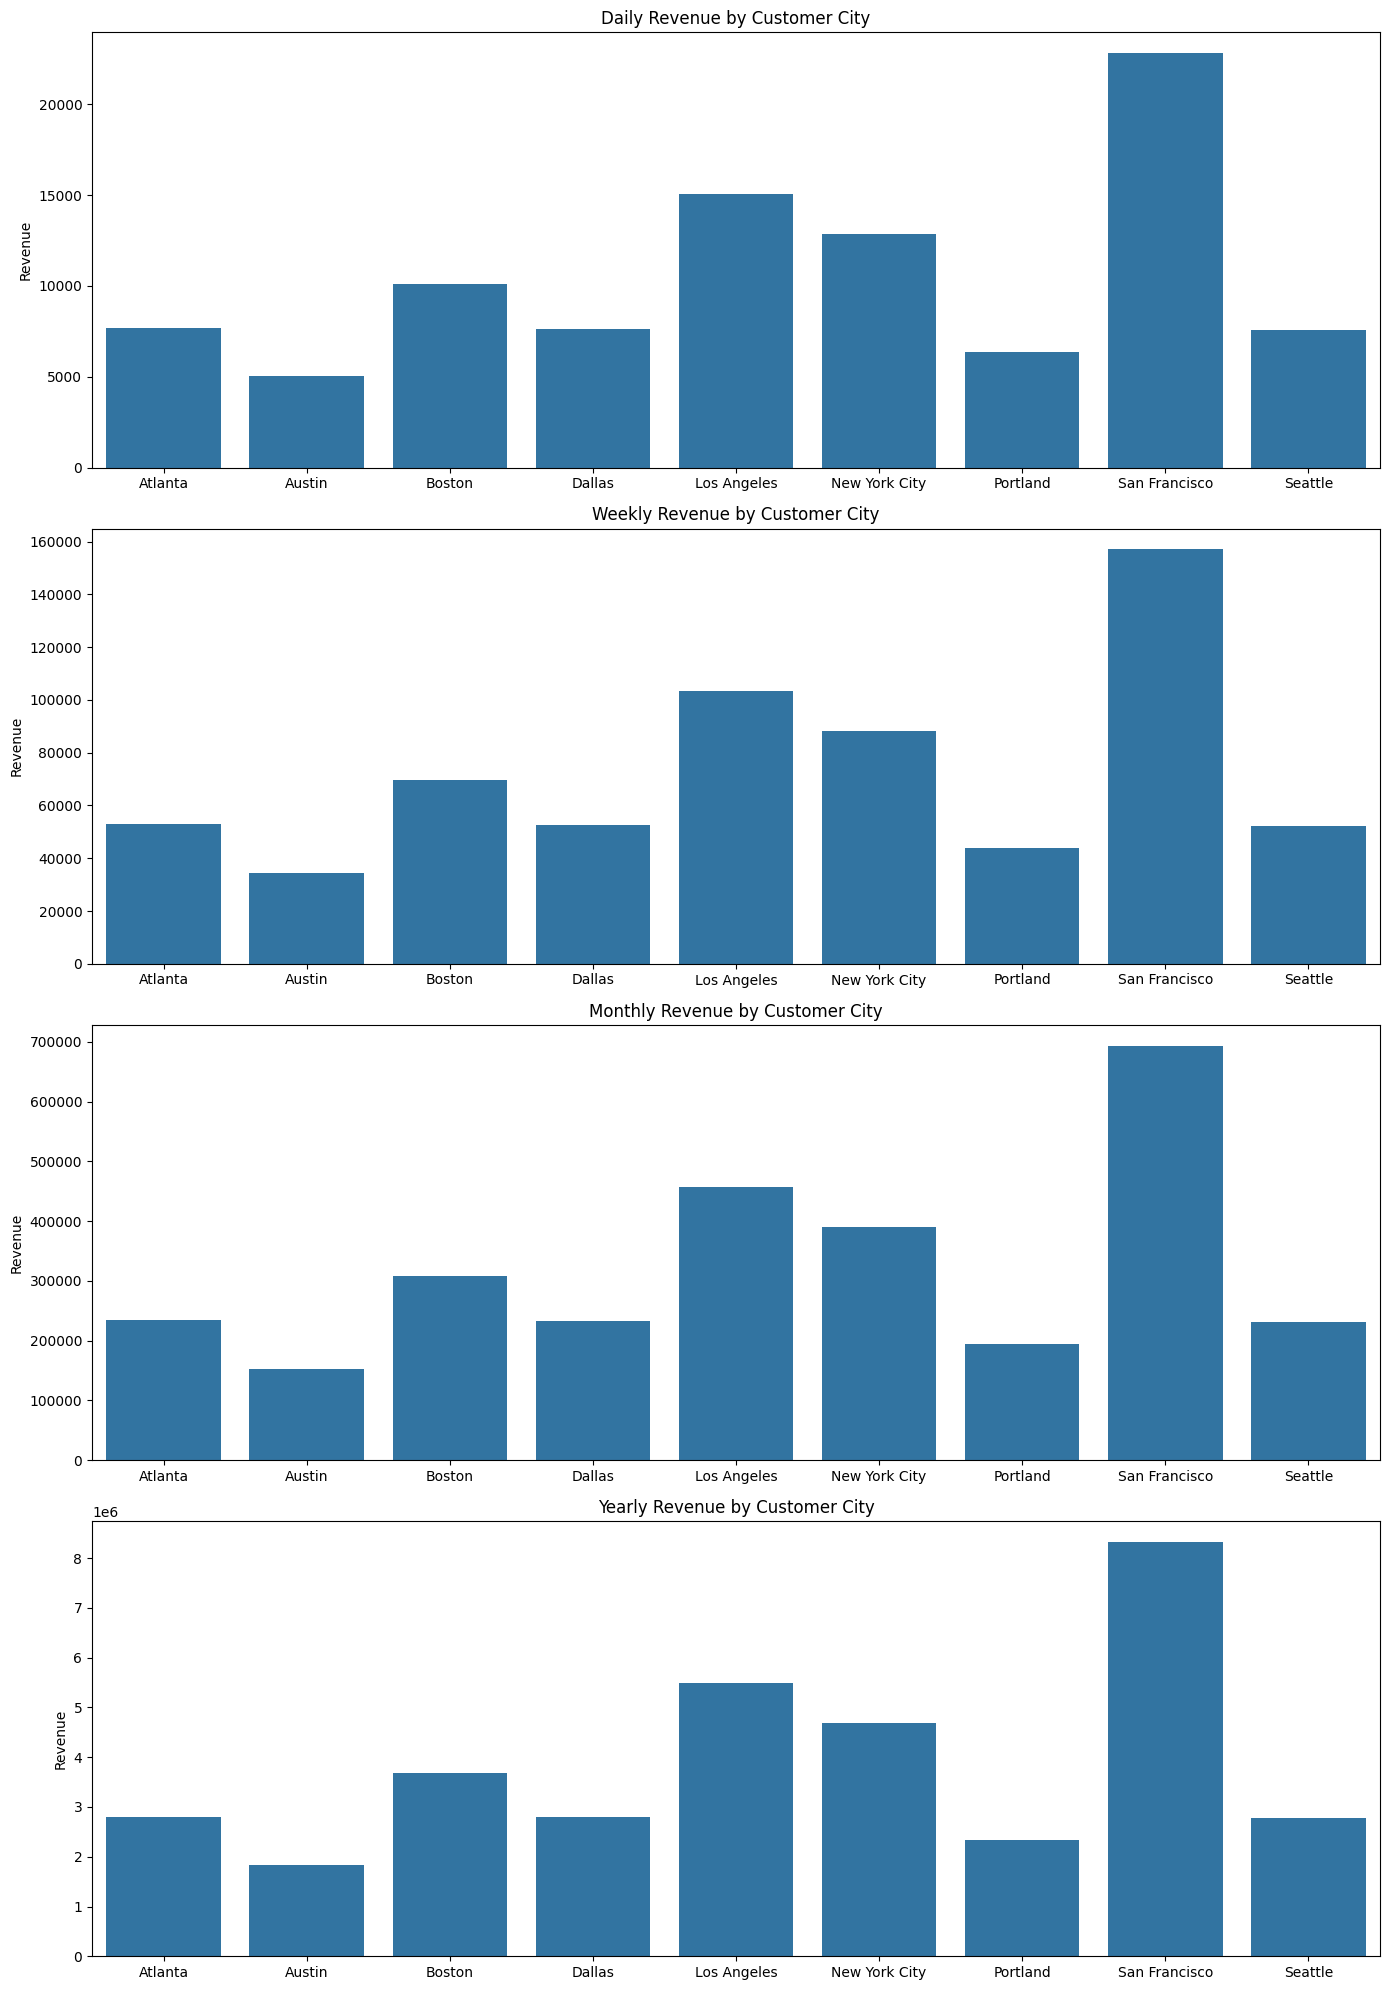

In [38]:
dailycity = df.groupby(['day','city'],as_index=False)['revenue'].sum()
weeklycity = df.groupby(['week','city'],as_index=False)['revenue'].sum()
monthlycity = df.groupby(['month','city'],as_index=False)['revenue'].sum()
yearlycity = df.groupby(['year','city'],as_index=False)['revenue'].sum()


fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharey=False)

sns.barplot(data=dailycity, x='city', y='revenue',errorbar=None, ax=axes[0])
axes[0].set_title('Daily Revenue by Customer City')
axes[0].set_xlabel(None)
axes[0].set_ylabel('Revenue')
axes[0].tick_params(axis='x')

sns.barplot(data=weeklycity, x='city', y='revenue',errorbar=None, ax=axes[1])
axes[1].set_title('Weekly Revenue by Customer City')
axes[1].set_xlabel(None)
axes[1].set_ylabel('Revenue')
axes[1].tick_params(axis='x')

sns.barplot(data=monthlycity, x='city', y='revenue',errorbar=None, ax=axes[2])
axes[2].set_title('Monthly Revenue by Customer City')
axes[2].set_xlabel(None)
axes[2].set_ylabel('Revenue')
axes[2].tick_params(axis='x')

sns.barplot(data=yearlycity, x='city', y='revenue',errorbar=None, ax=axes[3])
axes[3].set_title('Yearly Revenue by Customer City')
axes[3].set_xlabel(None)
axes[3].set_ylabel('Revenue')
axes[3].tick_params(axis='x')

plt.tight_layout()
plt.show()

# What product are the most frequently brought together?

In [35]:
from itertools import combinations
from collections import Counter

df_together = df[df['order_id'].duplicated(keep=False)].copy()

df_together['Grouped'] = df_together.groupby('order_id')['product'].transform(lambda x: ','.join(x))

df_together = df_together[['order_id', 'Grouped']].drop_duplicates()

count = Counter()

for row in df_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

top_pairs = count.most_common(10)

pairs = [' & '.join(pair) for pair, _ in top_pairs]
counts = [c for _, c in top_pairs]


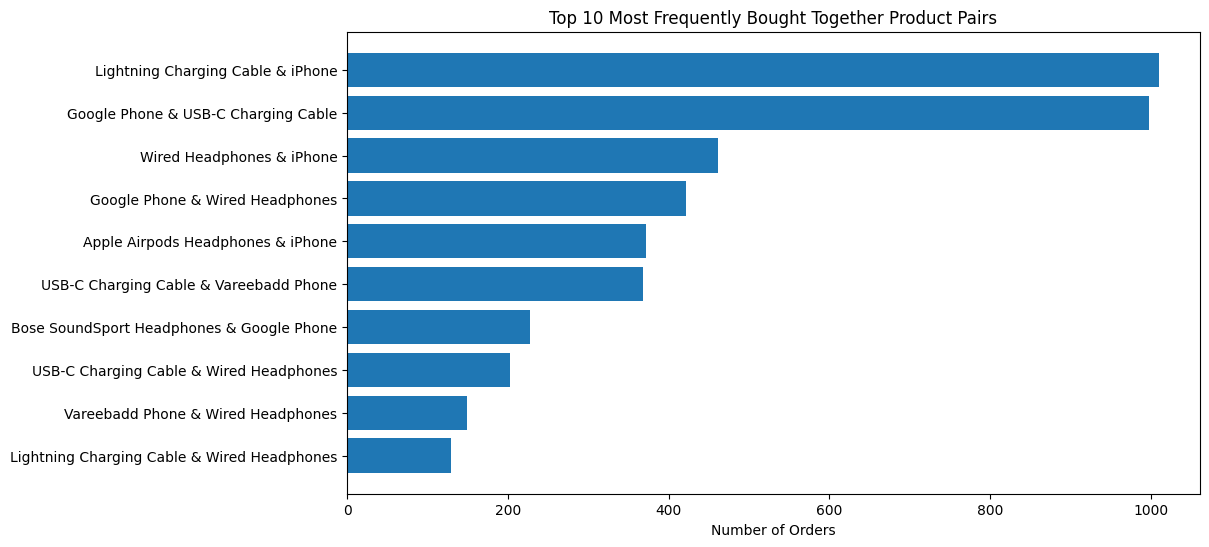

In [36]:
plt.figure(figsize=(11,6))
plt.barh(pairs, counts)
plt.xlabel('Number of Orders')
plt.title('Top 10 Most Frequently Bought Together Product Pairs')
plt.gca().invert_yaxis()
plt.show()

# Conclusion

This analysis examined sales volume and revenue during the 2019 calendar year. The results indicate that both sales and revenue increased toward the end of the year. Among all products, the MacBook Pro generated the highest total revenue, while AA and AAA batteries recorded the highest sales volume. Revenue and customer activity were also concentrated in a small number of cities, with San Francisco contributed the highest number of customer. Additionally, analysis of frequently purchased product combinations shows that the Lightning Charging Cable and iPhone were the most commonly bought together.

# Caveat

This dataset does not include the cost per item, therefore profit and margin analysis cannot be performed. All financial insights in this analysis are based on revenue and sales volume only.